In [1]:
import praw

# Step 1: Authenticate with Reddit
reddit = praw.Reddit(
    client_id="2br9WYIk4kPbyKYN0HPoyg",
    client_secret="rVp-xBLofl10MaMkb2QM-PTCgTx5ZA",
    user_agent="Sentiments Analysis"
)

# Step 2: Get the Reddit post
post_url = "https://www.reddit.com/r/ThatsInsane/comments/177rgym/how_el_salvador_deals_with_pedophiles/"
submission = reddit.submission(url=post_url)

# Step 3: Extract the topic (post title) and all comments
post_title = submission.title
comments = []

# Collecting comments recursively (up to two levels of replies by default)
submission.comments.replace_more(limit=None)
for top_level_comment in submission.comments:
    comments.append(top_level_comment.body)
    for reply in top_level_comment.replies:
        comments.append(reply.body)

# Display results
print("Post Title:", post_title)
print("Comments:", comments)

Post Title: How El Salvador deals with pedophiles
Comments: ['I fully expected a more graphic ending to that press conference.', 'Really excepted his head to be gone by the end of it', 'For real. I been watching too much Gen V or something', 'Yeah when I saw some beat-to-fuck dude getting loaded in the back of a pickup by armed dudes, I had to check what subreddit this was.\n\nThat story can end much differently.', 'Without trial?..', 'Especially when he was ushered out of the cell, I was like “your a little too hyped to be shot my fella”', "He's lucky the police got to him before the villagers. Usually they hang a gas filled tire around their neck, tie them to a tree and set them on fire", 'A South African necklace', 'I hope the tree is ok', 'Thats on Guatemala..', 'Are you being serious?', "Really? Where do they do that? That's awesome", '“usually they…”\n\nhe typed with full confidence before repeating something he mis remembers from the internet', 'Source?', 'Should start with legs

In [2]:
import pandas as pd

# Organize data into a DataFrame
df = pd.DataFrame({
    "comment": comments
})

# Save to a CSV file if needed
df.to_csv("reddit_comments1.csv", index=False)

# Display the first few comments
df.head()

,comment
0,I fully expected a more graphic ending to that...
1,Really excepted his head to be gone by the end...
2,For real. I been watching too much Gen V or so...
3,Yeah when I saw some beat-to-fuck dude getting...
4,Without trial?..


In [3]:
# DATA CLEANING PROCESS

import re

# Function to clean text
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)     # Remove mentions
    text = re.sub(r"[^A-Za-z\s]", "", text)  # Remove special characters
    text = text.lower().strip()  # Convert to lowercase and strip extra whitespace
    return text

# Apply the function to each comment
df["cleaned_comment"] = df["comment"].apply(clean_text)
print(df[["comment", "cleaned_comment"]].head())


                                             comment  \
0  I fully expected a more graphic ending to that...   
1  Really excepted his head to be gone by the end...   
2  For real. I been watching too much Gen V or so...   
3  Yeah when I saw some beat-to-fuck dude getting...   
4                                   Without trial?..   

                                     cleaned_comment  
0  i fully expected a more graphic ending to that...  
1  really excepted his head to be gone by the end...  
2  for real i been watching too much gen v or som...  
3  yeah when i saw some beattofuck dude getting l...  
4                                      without trial  


In [4]:
df.head()

,comment,cleaned_comment
0,I fully expected a more graphic ending to that...,i fully expected a more graphic ending to that...
1,Really excepted his head to be gone by the end...,really excepted his head to be gone by the end...
2,For real. I been watching too much Gen V or so...,for real i been watching too much gen v or som...
3,Yeah when I saw some beat-to-fuck dude getting...,yeah when i saw some beattofuck dude getting l...
4,Without trial?..,without trial


In [5]:
from textblob import TextBlob
!pip install textblob

# Function to get sentiment
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity  # Range from -1 (negative) to +1 (positive)
    return sentiment

# Apply sentiment analysis
df["sentiment"] = df["cleaned_comment"].apply(get_sentiment)

# Inspect the results
print(df[["cleaned_comment", "sentiment"]].head())


                                     cleaned_comment  sentiment
0  i fully expected a more graphic ending to that...   0.133333
1  really excepted his head to be gone by the end...   0.200000
2  for real i been watching too much gen v or som...   0.200000
3  yeah when i saw some beattofuck dude getting l...   0.000000
4                                      without trial   0.000000


In [6]:
def classify_sentiment(polarity):
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

# Classify sentiment
df["sentiment_class"] = df["sentiment"].apply(classify_sentiment)
print(df[["cleaned_comment", "sentiment", "sentiment_class"]].head())


                                     cleaned_comment  sentiment  \
0  i fully expected a more graphic ending to that...   0.133333   
1  really excepted his head to be gone by the end...   0.200000   
2  for real i been watching too much gen v or som...   0.200000   
3  yeah when i saw some beattofuck dude getting l...   0.000000   
4                                      without trial   0.000000   

  sentiment_class  
0        Positive  
1        Positive  
2        Positive  
3         Neutral  
4         Neutral  


In [7]:
df.head(100)

,comment,cleaned_comment,sentiment,sentiment_class
0,I fully expected a more graphic ending to that...,i fully expected a more graphic ending to that...,0.133333,Positive
1,Really excepted his head to be gone by the end...,really excepted his head to be gone by the end...,0.200000,Positive
2,For real. I been watching too much Gen V or so...,for real i been watching too much gen v or som...,0.200000,Positive
3,Yeah when I saw some beat-to-fuck dude getting...,yeah when i saw some beattofuck dude getting l...,0.000000,Neutral
4,Without trial?..,without trial,0.000000,Neutral
...,...,...,...,...
95,extrajudicial punishment is pretty insane,extrajudicial punishment is pretty insane,-0.375000,Negative
96,FR,fr,0.000000,Neutral
97,Life in prison for that guy in El Salvador wil...,life in prison for that guy in el salvador wil...,0.000000,Neutral
98,Life sentence will be about 2 days when the ot...,life sentence will be about days when the oth...,-0.125000,Negative


In [8]:
print(df["sentiment_class"].value_counts())

Neutral     241
Positive    100
Negative     66
Name: sentiment_class, dtype: int64


In [9]:
df.to_csv("reddit_comments_with_sentiment.csv", index=False)

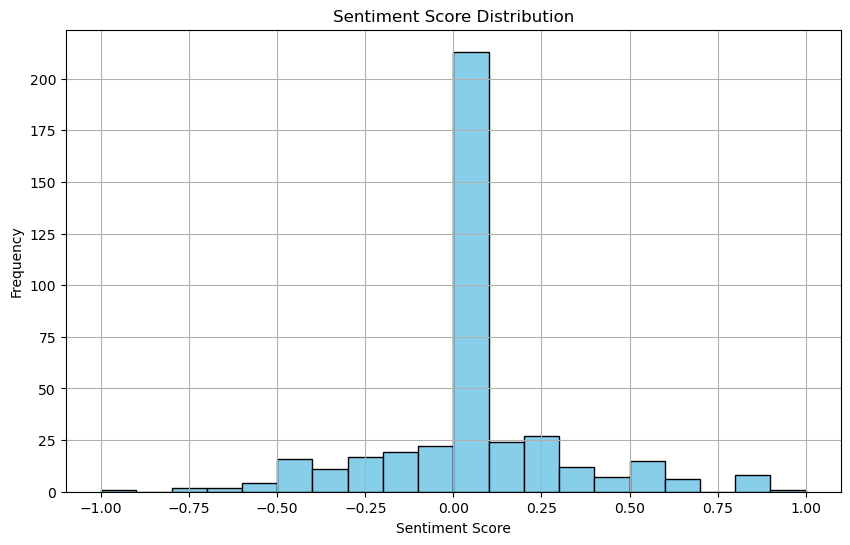

In [10]:
import matplotlib.pyplot as plt

# Plot a histogram of sentiment scores
plt.figure(figsize=(10, 6))
df['sentiment'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


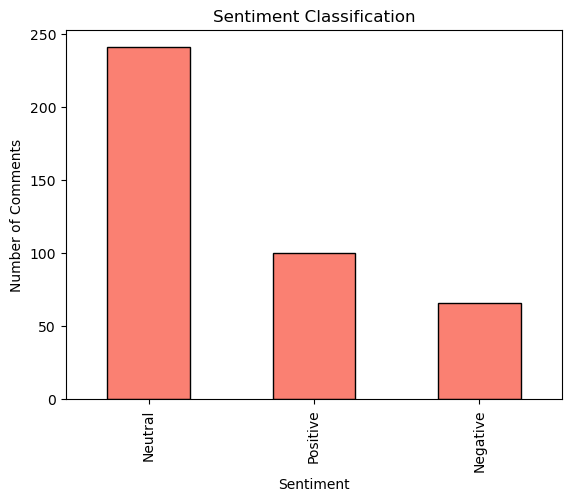

In [11]:
df['sentiment_class'].value_counts().plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Sentiment Classification')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()

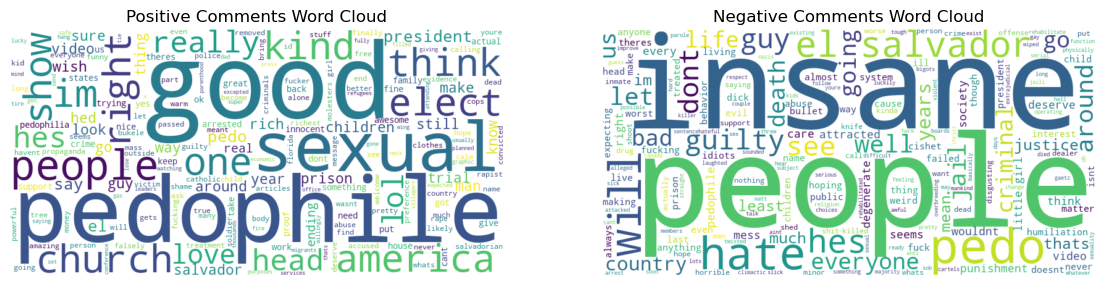

In [12]:
from wordcloud import WordCloud

# Separate positive and negative comments
positive_comments = " ".join(df[df["sentiment_class"] == "Positive"]["cleaned_comment"])
negative_comments = " ".join(df[df["sentiment_class"] == "Negative"]["cleaned_comment"])

# Generate word clouds
wordcloud_pos = WordCloud(width=800, height=400, background_color="white").generate(positive_comments)
wordcloud_neg = WordCloud(width=800, height=400, background_color="white").generate(negative_comments)

# Plot word clouds
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Comments Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Comments Word Cloud")

plt.show()

In [13]:
df.to_csv("reddit_comments_with_sentiment_analysis11.csv", index=False)

In [14]:
# Filter negative comments
negative_comments = df[df["sentiment"] < 0]

# Display the negative comments
print(negative_comments[["cleaned_comment", "sentiment"]])


                                       cleaned_comment  sentiment
5    especially when he was ushered out of the cell...  -0.093750
10                               are you being serious  -0.333333
17   el salvador doesnt fuck around in the last cou...  -0.166667
20   and in my country canada we let violent crimin...  -0.277778
27                    oh matt gaetz you slick pedo sob  -0.250000
..                                                 ...        ...
383  why do we let them live\n\nif they have pure e...  -0.062338
385  this right here is how all pedo need to be dea...  -0.357143
388  brings comfort to see so many people wanting j...  -0.285714
401    escorting any prisoner while armed is dangerous  -0.600000
405                 so is the guy dead i hope hes dead  -0.200000

[94 rows x 2 columns]


In [16]:
# Filter negative comments
positive_comments = df[df["sentiment"] > 0]

# Display the negative comments
print(positive_comments[["cleaned_comment", "sentiment"]])


                                       cleaned_comment  sentiment
0    i fully expected a more graphic ending to that...   0.133333
1    really excepted his head to be gone by the end...   0.200000
2    for real i been watching too much gen v or som...   0.200000
6    hes lucky the police got to him before the vil...   0.161111
8                                i hope the tree is ok   0.500000
..                                                 ...        ...
396  how come el salvador gets something right that...   0.392857
397  perro cagado im mexican so ive never heard thi...   0.200000
399  i know hes a piece of shit but idk this didnt ...   0.042857
404  i support dealing with these people strongly b...   0.296667
406                                     and rightly so   0.285714

[132 rows x 2 columns]
